# Natural Language Processing

Here, I will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. There will be a utilization of the Scikit-learn's pipeline methods for more complex tasks.

**dataset: [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013)**

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Getting the data

In [2]:
yelp_df = pd.read_csv('yelp.csv')

In [3]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


#### Checking the info() and describe() methods:

In [4]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


#### Creating a new column called "text_length" which is the number of words in the text column:

In [6]:
yelp_df['text_length'] = yelp_df['text'].apply(len)

In [7]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


## Exploratory Data Analysis

#### Setting the seaborn plots' style:

In [9]:
sns.set_style('darkgrid')

#### Using FacetGrid from the seaborn library to create a grid of 5 histograms of *text length* based on the *stars* ratings:

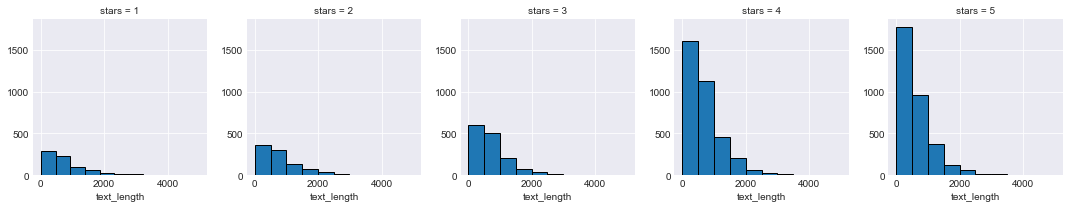

In [11]:
graph = sns.FacetGrid(data=yelp_df, col='stars')
graph.map(plt.hist, 'text_length', edgecolor="k")

#### Creating a boxplot of text length for each star category:

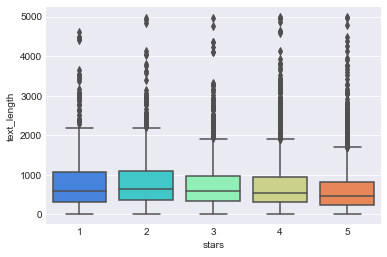

In [13]:
sns.boxplot(data=yelp_df, x='stars', y='text_length', palette='rainbow')

#### Creating a countplot of the number of occurrences for each type of star rating:

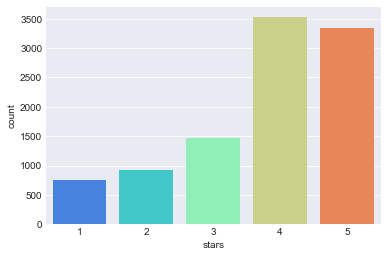

In [14]:
sns.countplot(data=yelp_df, x='stars', palette='rainbow')

####  Using groupby to get the mean values of the numerical columns. Creating also a new dataframe with that operation:

In [16]:
stars_df = yelp_df.groupby(by='stars').mean()

In [17]:
stars_df

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


#### Using the *corr()* method on that groupby dataframe to produce this dataframe:

In [18]:
stars_df.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


#### Using seaborn to create a heatmap based off that *.corr() dataframe*:

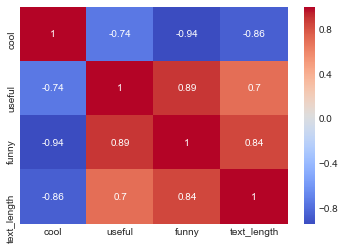

In [20]:
sns.heatmap(data=stars_df.corr(), cmap='coolwarm', annot=True)

## NLP Classification Task

Here, I make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

#### Creating a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews:

In [23]:
yelp_class = yelp_df[(yelp_df['stars'] == 1) | (yelp_df['stars'] == 5)]

In [24]:
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


#### Creating two objects *X* and *y*. *X* is the 'text' column of yelp_class and *y* is the 'stars' column of yelp_class. (They are the features and the target/labels):

In [25]:
X = yelp_class['text']

In [26]:
y = yelp_class['stars']

### Bag of Words
#### Importing CountVectorizer and creating a CountVectorizer object:

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cv = CountVectorizer()

#### Using the *fit_transform* method on the CountVectorizer object and passing in X (the 'text' column). I save this result by overwriting X:

In [30]:
X = cv.fit_transform(X)

In [33]:
# checking the shape of the sparse matrix
X.shape

(4086, 19183)

In [34]:
# checking the non zero values of the sparse matrix
X.nnz

317288

## Train/Test Split

#### Using train_test_split to split up the data into X_train, X_test, y_train, y_test. I use test_size=0.3 and random_state=101:

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Train a Machine Learning model (Naive Bayes)

#### Importing MultinomialNB and creating an instance of the estimator. I call it *nb*:

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
nb = MultinomialNB()

#### Fitting *nb* using the training data:

In [39]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

#### Using the *predict* method to *nb* to predict labels from X_test:

In [40]:
predictions = nb.predict(X_test)

####  Creating a confusion matrix and classification report using these predictions and y_test:

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print('Classification report:')
print(classification_report(y_test, predictions))

Classification report:
             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



In [43]:
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions))

Confusion matrix:
[[159  69]
 [ 22 976]]


Next, I'll try to include TF-IDF to this process using a pipeline.

## Using Text Processing

#### Importing TfidfTransformer from sklearn:

In [44]:
from sklearn.feature_extraction.text import TfidfTransformer

#### Importing Pipeline from sklearn:

In [45]:
from sklearn.pipeline import Pipeline

#### Creating a pipeline with the following steps: CountVectorizer(), TfidfTransformer(), MultinomialNB():

In [46]:
pipeline = Pipeline([
    ('bag_of_words', CountVectorizer()),  # strings to token integer counts
    ('tfidf_scores', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB())  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Using the Pipeline

#### This pipeline has all the pre-process steps in it already, meaning I only need to re-split the original data (Remember that I overwrote X as the CountVectorized version). 

### Train Test Split
**Redoing the train test split on the yelp_class object:**

In [47]:
X = yelp_class['text']

In [48]:
y = yelp_class['stars']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Fit the pipeline to the training data. Remember that I can't use the same training data as last time because that data has already been vectorized. I need to pass in just the text and labels:

In [50]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bag_of_words', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
     ...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

#### Using the pipeline to predict from the *X_test* and creating a classification report and confusion matrix:

In [51]:
predictions = pipeline.predict(X_test)

In [52]:
print('Classification report with Pipeline:')
print(classification_report(y_test, predictions))

Classification report with Pipeline:
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



/Users/pantelistzamalis/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
print('Confusion matrix with Pipeline:')
print(confusion_matrix(y_test, predictions))

Confusion matrix with Pipeline:
[[  0 228]
 [  0 998]]


Looks like Tf-Idf actually made things worse!

Note: Trying some different things to this kind of processing could make things work better, like:
1) trying going back and playing around with the pipeline steps and seeing if creating a custom analyzer helps (note: it probably won't)
2) recreating the pipeline with just the CountVectorizer() and NaiveBayes
3) changing the ML model at the end to another classifier could help

I 'll come up again in the future with updating this Jupyter Notebook file, and implementing all the possible ways that I mentioned above.